<a href="https://colab.research.google.com/github/VENNELA2132/ML-Project_vennela2132/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [6]:
df=pd.read_csv("/content/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.shape

(145460, 23)

In [8]:
df.isna().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Here we can find there are many missing values in the data.**


**So we need to find the percentage of missing values per column.** 

In [9]:
for col in df.columns:
  print(col,"\t",(df[col].isna().sum()/df[col].size)*100)

Date 	 0.0
Location 	 0.0
MinTemp 	 1.0208992162793895
MaxTemp 	 0.8669049910628353
Rainfall 	 2.2418534304963567
Evaporation 	 43.166506256015396
Sunshine 	 48.00976213391998
WindGustDir 	 7.098858792795271
WindGustSpeed 	 7.055547916953114
WindDir9am 	 7.263852605527293
WindDir3pm 	 2.906641000962464
WindSpeed9am 	 1.214766946239516
WindSpeed3pm 	 2.105046060772721
Humidity9am 	 1.8245565791282825
Humidity3pm 	 3.09844630826344
Pressure9am 	 10.356799120033
Pressure3pm 	 10.331362573903478
Cloud9am 	 38.42155919153032
Cloud3pm 	 40.80709473394747
Temp9am 	 1.214766946239516
Temp3pm 	 2.4810944589577892
RainToday 	 2.2418534304963567
RainTomorrow 	 2.245978275814657


We can see that **"Evaporation","Sunshine","Cloud3pm"** and **"Cloud9am"** have large percentage of missing values so these columns do not give much useful information. 

We have to remove them.




In [10]:
dcs=dict()
lst=["Evaporation","Sunshine","Cloud3pm","Cloud9am"]
for col in df.columns:
  if col not in lst:
    dcs.update({col:df[col]})


df_new=pd.DataFrame(dcs)
df_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Now we have to fill the missing values using **SimpleImputer**.

In [11]:
from sklearn.impute import SimpleImputer

smp=SimpleImputer(missing_values=np.NaN, strategy='most_frequent') #for string values we use "most_frequent" strategy
smf=SimpleImputer(missing_values=np.NaN, strategy='mean')  #for float or int values we use "mean" strategy
for col in df_new.columns:
  if df_new[col].dtype=='O':
    df_new.loc[:,[col]]=smp.fit_transform(df_new.loc[:,[col]])
  else:
    df_new.loc[:,[col]]=smf.fit_transform(df_new.loc[:,[col]])


df_new.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now, lets find the no. of unique values in each feature.

In [12]:
for col in df_new.columns:
  print(col,df_new[col].unique().size)



Date 3436
Location 49
MinTemp 390
MaxTemp 506
Rainfall 682
WindGustDir 16
WindGustSpeed 68
WindDir9am 16
WindDir3pm 16
WindSpeed9am 44
WindSpeed3pm 45
Humidity9am 102
Humidity3pm 102
Pressure9am 547
Pressure3pm 550
Temp9am 442
Temp3pm 503
RainToday 2
RainTomorrow 2


Let us find how the Possibility of rain occuring the next day varies with the other features through **Graphs**.


---


Here we convert the string type variables in "RainTomorrow" to Integer type to analyse the data in a better way through graphs.

***(Yes-1,No-0)***.

In [13]:
dcs=dict()
unique_val=np.unique(df_new["RainTomorrow"].values)
for i,v in enumerate(unique_val):
  dcs.update({v:i})
df_new["RainTomorrow"]=df_new["RainTomorrow"].map(dcs)
y=df_new["RainTomorrow"]


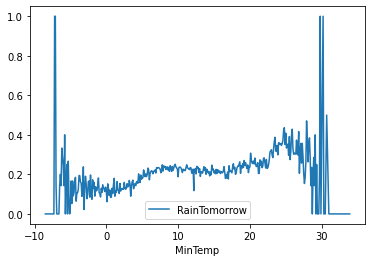

In [14]:
df_new[["RainTomorrow","MinTemp"]].groupby("MinTemp").mean().plot(kind="line")

From here We can observe that 
*   When the preious day's Minimum temperature is between (-6 to -7) or (25 to 30) there is higher possibility of Rain occuring the next day.



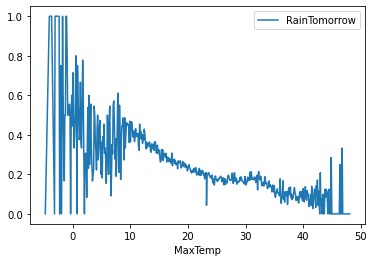

In [15]:
df_new[["RainTomorrow","MaxTemp"]].groupby("MaxTemp").mean().plot(kind="line")

From here We can observe that 
*   When the previous day's Maximum temperature is between (-4 to 0) there is higher possibility of Rain occuring the next day.

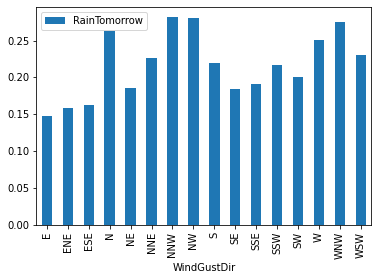

In [16]:
df_new[["RainTomorrow","WindGustDir"]].groupby("WindGustDir").mean().plot(kind="bar")

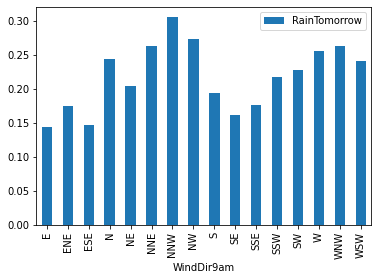

In [17]:
df_new[["RainTomorrow","WindDir9am"]].groupby("WindDir9am").mean().plot(kind="bar")

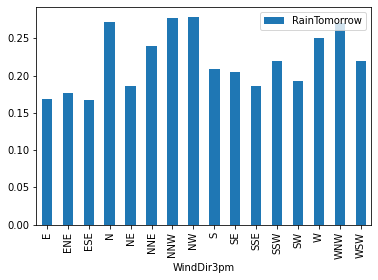

In [18]:
df_new[["RainTomorrow","WindDir3pm"]].groupby("WindDir3pm").mean().plot(kind="bar")

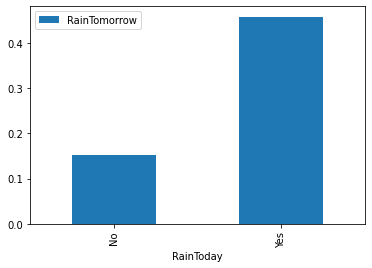

In [19]:
df_new[["RainTomorrow","RainToday"]].groupby("RainToday").mean().plot(kind="bar",label=True)

We can observe from these graphs that 



*   There is 16% chance of rain occuring the next day when there is no rain the previous day.

*  There is 44% chance of rain occuring the next day when there is rain  the previous day.

*   There is higher possiblity of rain occuring the next day when the Wind Gust direction is NNW








In [20]:
df_new.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

Here we can see that there are object type variables in the given data which have to be converted to integer type.

We can use **LabelEncoder** which gives unique values for each string in a given column.

In [21]:
from sklearn.preprocessing import LabelEncoder

ls=LabelEncoder()
for col in df_new.columns:
  if df_new[col].dtype=='O':
    df_new[col]=ls.fit_transform(df_new[col])
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,397,2,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,398,2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,399,2,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,400,2,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,3432,41,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,3433,41,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
145458,3434,41,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


In [22]:
df=df_new
df.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

Now We have data without missing values and without strings so we can create **A Machine Learning Model** which predicts the next day's weather as 1 for "Yes" and 0 for "No"

In [23]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,1928.475478,23.793524,12.194034,23.221348,2.360918,8.09360,40.035230,6.999526,7.798852,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,16.990631,21.683390,0.219167,0.219146
std,884.988002,14.228687,6.365750,7.088124,8.382488,4.69411,13.118253,4.515839,4.538135,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,6.449221,6.850057,0.413683,0.413669
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,1167.000000,11.000000,7.700000,18.000000,0.000000,4.00000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,0.000000,0.000000
50%,1951.000000,24.000000,12.100000,22.700000,0.000000,9.00000,39.000000,7.000000,8.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,16.800000,21.400000,0.000000,0.000000
75%,2693.000000,36.000000,16.800000,28.200000,1.000000,13.00000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,0.000000,0.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,15.00000,135.000000,15.000000,15.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [24]:
cor_mat=df.corr()
cor_mat

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.019887,0.020929,0.043892,-0.012112,-0.019588,-0.022976,0.002318,0.002245,-0.012682,-0.022834,0.000045,-0.010951,0.031792,0.025755,0.031165,0.031318,-0.012801,-0.013013
Location,0.019887,1.000000,-0.006766,-0.020784,-0.002732,-0.003732,0.068780,-0.002439,0.008769,0.076403,0.063569,-0.000038,0.012786,0.036066,0.045937,-0.015990,-0.023260,-0.005484,-0.005498
MinTemp,0.020929,-0.006766,1.000000,0.733400,0.102706,-0.136443,0.172553,-0.031327,-0.159783,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.897692,0.699211,0.054559,0.082173
MaxTemp,0.043892,-0.020784,0.733400,1.000000,-0.074040,-0.211930,0.065895,-0.212968,-0.182044,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,0.879170,0.968713,-0.225439,-0.156851
Rainfall,-0.012112,-0.002732,0.102706,-0.074040,1.000000,0.044620,0.126446,0.084716,0.048193,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.011069,-0.077684,0.499899,0.233900
WindGustDir,-0.019588,-0.003732,-0.136443,-0.211930,0.044620,1.000000,0.136200,0.353790,0.563161,0.008386,0.084011,0.068775,0.065027,-0.119516,-0.031416,-0.177746,-0.223028,0.124675,0.048774
WindGustSpeed,-0.022976,0.068780,0.172553,0.065895,0.126446,0.136200,1.000000,0.073234,0.135583,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.145904,0.031884,0.145700,0.220442
WindDir9am,0.002318,-0.002439,-0.031327,-0.212968,0.084716,0.353790,0.073234,1.000000,0.301249,0.108959,0.111575,0.088769,0.148476,-0.049202,0.040928,-0.116825,-0.220361,0.167718,0.035341
WindDir3pm,0.002245,0.008769,-0.159783,-0.182044,0.048193,0.563161,0.135583,0.301249,1.000000,0.050192,0.090691,0.026167,-0.006052,-0.133330,-0.037334,-0.176633,-0.193989,0.121719,0.028890
WindSpeed9am,-0.012682,0.076403,0.173404,0.014294,0.085925,0.008386,0.577319,0.108959,0.050192,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.127592,0.004476,0.098636,0.086661


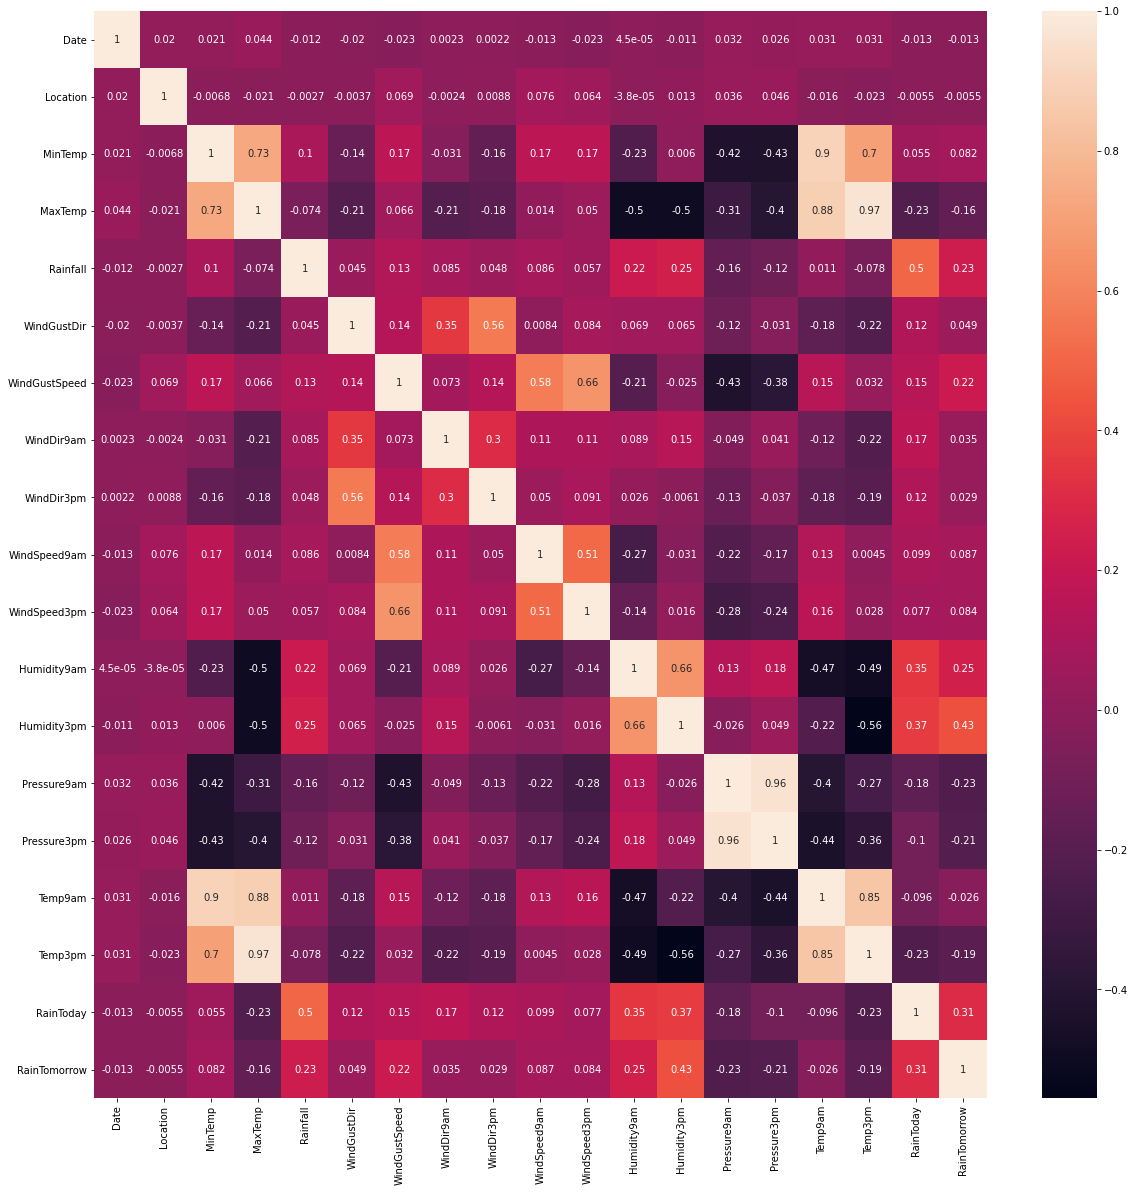

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

Correlation matrix shows us the relation between any two features and how they strongly they can vary upon changing other variable.


Here, we observe:

*   RainTomorrow is highly correlated with Humidity3pm when compared to other features.
*   RainTomorrow is weakly correlated with Date,Location,WindGustDir,WindDir3pm,WindDir9am so we can drop them.







In [26]:
df.drop(["Date","Location","WindGustDir","WindDir3pm","WindDir9am"],inplace=True,axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


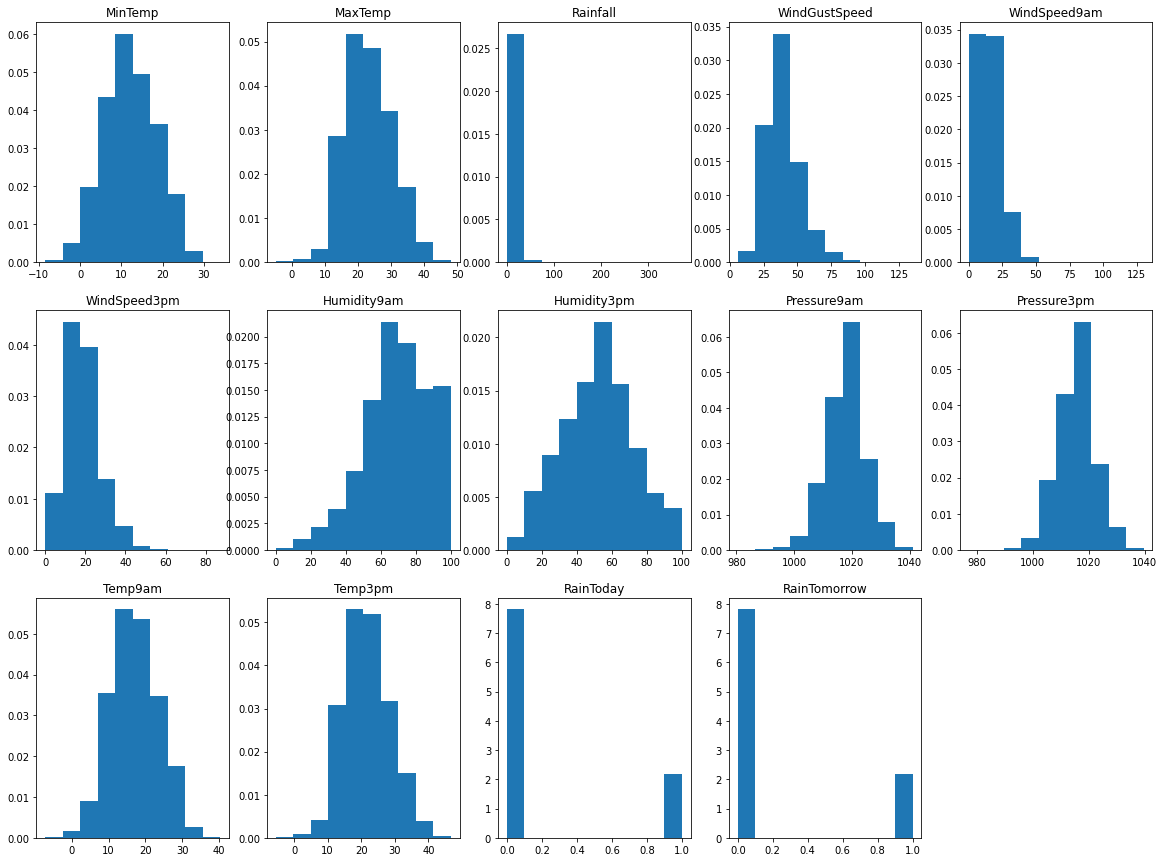

In [27]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
  plt.subplot(3,5,i+1)
  plt.hist(df[col],density=True)
  plt.title(col)


In [28]:
df.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


 
*   Splitting Data into features and labels.






In [29]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


*   Standardizing 




In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
y.shape

(145460,)

*   Splitting data into training and testing data




In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (116368, 13)
X_test shape: (29092, 13)
y_train shape: (116368,)
y_test shape: (29092,)




*  Logistic Regression with Sklearn Library




In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()

lr.fit(X_train,y_train)

print("Accuracy with Logistic regression model:",lr.score(X_test,y_test))

Accuracy with Logistic regression model: 0.8411590815344424




*   Decision Tree Classifier with Sklearn Library



In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

dtc.fit(X_train,y_train)

print("Accuracy with Decision tree Classifier model:",dtc.score(X_test,y_test))

Accuracy with Decision tree Classifier model: 0.7778427058985288




*   Random Forest Classifier with sklearn library




In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)

print("Accuracy with Random Forest Classifier model:",rfc.score(X_test,y_test))

Accuracy with Random Forest Classifier model: 0.8494775195930152


In [35]:
#Therefore we find Random Forest Classifier gives best accuracy score when compared to others.